In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from matplotlib import rc
import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.markers as m
from matplotlib.colors import Normalize
import random 
from random import sample
import matplotlib.gridspec as gridspec
from scipy.stats import kstest,ks_2samp,binned_statistic,linregress,spearmanr,pearsonr,mannwhitneyu
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
from random import choice
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error,median_absolute_error
from scipy.stats import iqr, median_abs_deviation, binned_statistic
from scipy.optimize import curve_fit

from astropy.constants import G
from astropy import units as u


In [3]:
data_og = ascii.read('host_og_vals_mw_new.table')
df_og = data_og.to_pandas()

data_all = ascii.read('mwm_all.table')
data_all = ascii.read('mwm_all_1rvir.table')
df_all = data_all.to_pandas()

data_ns = ascii.read('mwm_host_1rvir.table')
df_ns = data_ns.to_pandas()

data_cat = ascii.read('host_ES_vals_cat.table')
df_cat = data_cat.to_pandas()

data_noSS = ascii.read('mwm_no_ss.table')
df_no_ss = data_noSS.to_pandas()

#data_all_rhap_rm = ascii.read('all_rhap_rock_mass.table') #rhapsody all particles, using rockstar Mvir
#df_all_rhap_rm = data_all_rhap_rm.to_pandas()

data_all_rhap_rock = ascii.read('host_og_vals_rhap2.table') #rhapsody rockstar values
df_all_rhap_rock = data_all_rhap_rock.to_pandas()

#data_ns_rhap_rm = ascii.read('host_rhap_rock_mass.table') #rhapsody no subhalos,rockstar Mvir
#df_ns_rhap_rm = data_ns_rhap_rm.to_pandas()

df_all_rhap_rm = ascii.read('rhap_all_props_1rvir.table').to_pandas()
df_ns_rhap_rm = ascii.read('rhap_host_props_1rvir.table').to_pandas()

df_ns_rhap_rm_new_rvir = ascii.read('rhap_host_props_new_rvir_mvir.table').to_pandas()
df_ns_mwm_rm_new_rvir = ascii.read('mwm_host_new_rvir_mvir.table').to_pandas()

data_og_mmmz = ascii.read('host_og_vals_mw_new2.table') #milky way data from hlists w/ scale factor info
df_og_mmmz = data_og_mmmz.to_pandas()

#mwm_sub_mass = np.load('sub_mass.npy')
#mass_frac_mmmz = mwm_sub_mass/(df_og_mmmz['mvir'])#df_og_mmmz['sub_mass']/(df_og_mmmz['sub_mass']+df_og_mmmz['mvir'])
mass_frac_mmmz = df_og_mmmz['sub_mass']/(df_og_mmmz['mvir'])

mass_frac_rhap = df_all_rhap_rock['sub_mass']/(df_all_rhap_rock['mvir'])

rhap_70_mass_scale = np.load('rhapsody_70mass_scale.npy')
mwm_70_mass_scale = np.load('mw_70mass_scale.npy')

rhap_90_mass_scale = np.load('rhapsody_90mass_scale.npy')
mwm_90_mass_scale = np.load('mw_90mass_scale.npy')

rhap_99_mass_scale = np.load('rhapsody_99mass_scale.npy')
mwm_99_mass_scale = np.load('mw_99mass_scale.npy')

rhap_50_mass_scale = np.load('rhapsody_50mass_scale.npy')
mwm_50_mass_scale = np.load('mw_50mass_scale.npy')

rhap_25_mass_scale = np.load('rhapsody_25mass_scale.npy')
mwm_25_mass_scale = np.load('mw_25mass_scale.npy')

rhap_01_mass_scale = np.load('rhapsody_01mass_scale.npy')
rhap_80_mass_scale = np.load('rhapsody_80mass_scale.npy')

rhap_mass_scale = np.load('rhapsody_50mass_scale.npy')

mass_ratio_rhap = df_all_rhap_rock['max_mass_sub']/df_all_rhap_rock['mvir']
mass_ratio_mmmz = df_og_mmmz['max_mass_sub']/df_og_mmmz['mvir']

rhap_no_norm_shape = np.load('rhap_w_sub_shape.npz')['c_to_a']
rhap_host_shape_no_norm = np.load('rhap_host_shape_no_norm.npz')['c_to_a']
rhap_no_norm_shape_1_it = np.load('rhap_host_shape_no_norm_1_it.npz')['c_to_a']

rhap_recalc_rvir_mvir = np.load('recalc_rvir_mvir_host.npz')
rhap_recalc_rvir = rhap_recalc_rvir_mvir['rvir']
rhap_recalc_mvir = rhap_recalc_rvir_mvir['mvir']

mwm_recalc_rvir_mvir = np.load('mwm_recalc_rvir_mvir_host.npz')
mwm_recalc_rvir = mwm_recalc_rvir_mvir['rvir']
mwm_recalc_mvir = mwm_recalc_rvir_mvir['mvir']

In [3]:
rhap_sub_masses = np.load('sub_masses.npy')
mwm_sub_masses = np.load('mwm_sub_mass.npy')

(array([17, 20, 46, 63, 76]),)


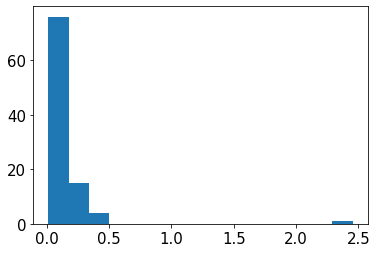

In [46]:
plt.hist(mass_frac_rhap,bins=15)
print(np.where(mass_frac_rhap>0.3))

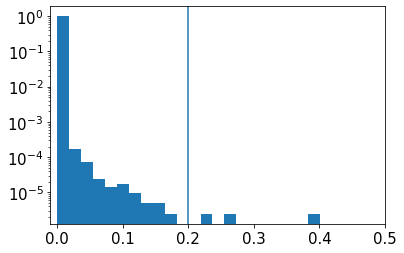

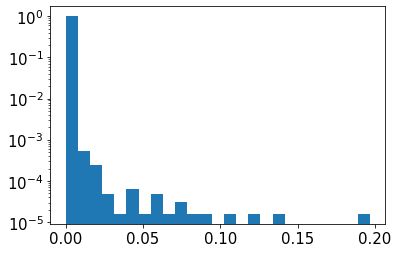

In [764]:
frq, edges = np.histogram(rhap_sub_masses,bins=120)
plt.bar(edges[:-1], frq/len(rhap_sub_masses), width=np.diff(edges), align="edge")
plt.yscale('log')
plt.axvline(0.2)
plt.xlim(-0.01,0.5)
plt.show()

frq, edges = np.histogram(mwm_sub_masses,bins=25)
plt.bar(edges[:-1], frq/len(mwm_sub_masses), width=np.diff(edges), align="edge")
plt.yscale('log')
plt.show()

In [4]:
cut1 = np.where(np.log10(df_all['calc_spin'])>-.5)
cut1 = list(cut1[0])
print(cut1)
df_all=df_all.drop(cut1).reset_index(drop=True)
df_ns=df_ns.drop(cut1).reset_index(drop=True)
df_og_mmmz=df_og_mmmz.drop(cut1).reset_index(drop=True)
mass_ratio_mmmz = mass_ratio_mmmz.drop(cut1).reset_index(drop=True)
mass_frac_mmmz = mass_frac_mmmz.drop(cut1).reset_index(drop=True)
mwm_25_mass_scale = np.delete(mwm_25_mass_scale,cut1)
mwm_50_mass_scale = np.delete(mwm_50_mass_scale,cut1)
mwm_70_mass_scale = np.delete(mwm_70_mass_scale,cut1)
mwm_90_mass_scale = np.delete(mwm_90_mass_scale,cut1)


#cut2 = np.where(mass_ratio_mmmz>.2)
#print(cut2[0])
#df_all=df_all.drop(cut2[0]).reset_index()
#df_ns=df_ns.drop(cut2[0]).reset_index()
#df_og_mmmz=df_og_mmmz.drop(cut2[0]).reset_index()
#mass_frac_mmmz = mass_frac_mmmz.drop(cut2[0]).reset_index()
#mass_ratio_mmmz = mass_ratio_mmmz.drop(cut2[0]).reset_index()
#mwm_25_mass_scale = np.delete(mwm_25_mass_scale,cut2[0])
#mwm_50_mass_scale = np.delete(mwm_50_mass_scale,cut2[0])
#mwm_70_mass_scale = np.delete(mwm_70_mass_scale,cut2[0])
#mwm_90_mass_scale = np.delete(mwm_90_mass_scale,cut2[0])


#cut1 = np.where(np.log10(df_all['calc_spin'])>-.5)
#print(cut1[0][0])
#df_all_rhap_rm=df_all_rhap_rm.drop(cut1[0][0])
#df_ns_rhap_rm=df_ns_rhap_rm.drop(cut1[0][0])
#df_all_rhap_rock=df_all_rhap_rock.drop(cut1[0][0])
#mass_ratio_rhap = mass_ratio_rhap.drop(cut1[0][0])


cut2 = np.where(mass_ratio_rhap>.2)
print(cut2[0])
df_all_rhap_rm=df_all_rhap_rm.drop(cut2[0]).reset_index(drop=True)
df_ns_rhap_rm=df_ns_rhap_rm.drop(cut2[0]).reset_index(drop=True)
df_all_rhap_rock=df_all_rhap_rock.drop(cut2[0]).reset_index(drop=True)
mass_ratio_rhap = mass_ratio_rhap.drop(cut2[0]).reset_index(drop=True)
mass_frac_rhap = mass_frac_rhap.drop(cut2[0]).reset_index(drop=True)
df_ns_rhap_rm_new_rvir = df_ns_rhap_rm_new_rvir.drop(cut2[0]).reset_index(drop=True)
rhap_25_mass_scale = np.delete(rhap_25_mass_scale,cut2[0])
rhap_50_mass_scale = np.delete(rhap_50_mass_scale,cut2[0])
rhap_70_mass_scale = np.delete(rhap_70_mass_scale,cut2[0])
rhap_90_mass_scale = np.delete(rhap_90_mass_scale,cut2[0])
rhap_no_norm_shape = np.delete(rhap_no_norm_shape,cut2[0])
rhap_host_shape_no_norm = np.delete(rhap_host_shape_no_norm,cut2[0])
rhap_host_shape_no_norm_1it = np.delete(rhap_no_norm_shape_1_it,cut2[0])
rhap_recalc_rvir = np.delete(rhap_recalc_rvir,cut2[0])
rhap_recalc_mvir = np.delete(rhap_recalc_mvir,cut2[0])

[]
[20 46 63 76]


In [161]:
(np.median(rhap_recalc_rvir)-np.median(df_all_rhap_rock['rvir']*0.001))/np.median(df_all_rhap_rock['rvir']*0.001)

-0.1382133722872402

In [5]:
#for hlist
names =['scale','ID','desc_scale','desc_id','num_prog','pid','upid','desc_pid',
    'phantom','sam_mvir','Mvir','Rvir','Rs', 'vrms', 'mmp', 'scale_of_last_MM',
    'Vmax', 'X','Y','Z','VX','VY','VZ','JX','JY','JZ','Spin','Breadth_first_ID',
    'Depth_first_ID','Tree_root_ID','Orig_halo_ID','Snap_num',
    'Next_coprogenitor_depthfirst_ID','Last_progenitor_depthfirst_ID',
    'Rs_Klypin','Mvir_all','M200b','M200c','M500c','M2500c','Xoff','Voff',
    'spin_bullock','b_to_a','c_to_a','A[x]','A[y]','A[z]','b_to_a(500c)',
    'c_to_a(500c)','A[x](500c)','A[y](500c)','A[z](500c)','T/|U|','Macc',
    'Mpeak','Vacc','Vpeak','Halfmass_Scale','Acc_Rate_Inst','Acc_Rate_100Myr',
    'Acc_Rate_Tdyn']

halo_names = []
host_ids = []
with open('hlist_halo_ids.txt') as f:
    for l in f:
        j = 0
        this_halo, host_id = l.split()#, block, _ = l.split()
        halo_names.append(this_halo)
        host_ids.append(host_id)
        j+=1 

In [6]:
for i,halo in enumerate(halo_names):
    #hostvalues = ascii.read('/Users/lmezini/proj_2/Halos_Recalculated/{}/out_0.list'.format(halo), format = 'commented_header')
    hostvalues = ascii.read('/Users/lmezini/proj_2/rs_files/Halo{}/hlist.list'.format(halo),names=names)
    loc = int(np.where(hostvalues['ID']==int(host_ids[i]))[0][0])


In [9]:
def get_med_shift_err(w_sub,wo_sub,n_smpls,n_boot = 1000):
    med_diffs = np.zeros(n_boot)
    for i in range(n_boot):
        w_sub_smpls = random.choices(np.array(w_sub),k=n_smpls)
        wo_sub_smpls = random.choices(np.array(wo_sub),k=n_smpls)
        med_diffs[i] += (np.median(w_sub_smpls)-np.median(wo_sub_smpls))/np.median(w_sub_smpls)
    return np.std(med_diffs, ddof=1)

def get_equal_bins(mass_frac,prop,n_bins = 9):

    step = int(np.floor(len(mass_frac)/n_bins))
    srtd = np.argsort(mass_frac)
    bin_meds = np.zeros(n_bins)
    bin_edges = np.zeros(n_bins+1)
    bin_stds = np.zeros(n_bins)
    j = 0

    for i in range(n_bins):
        if j > len(mass_frac):
            print("true")
            j=max(len(mass_frac))
            
        bin_stds[i] += np.std(prop[srtd][j:j+step])
        bin_meds[i]+= np.median(prop[srtd][j:j+step])
        bin_edges[i] += np.sort(mass_frac)[j]
        
        j+=step
    
    bin_edges[i+1] += max(np.sort(mass_frac))
    bin_cens = (bin_edges[:-1]+bin_edges[1:])/2.

    return bin_meds,bin_cens,bin_stds


45
MannwhitneyuResult(statistic=1495.0, pvalue=0.00010041140355440108)
med all:  11.909956605234079 5.344137156754728
med host:  15.529110711904435 5.577768090385526
MannwhitneyuResult(statistic=1115.0, pvalue=0.41044575851942355)
med all:  0.5811771154166128 0.18743281623568003
med host:  0.5871800051812482 0.1654709868184101
MannwhitneyuResult(statistic=669.0, pvalue=0.0056417509126853475)
med all:  -1.564942073342813 0.32379881019986967
med host:  -1.7364482238058019 0.3675452210417809


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


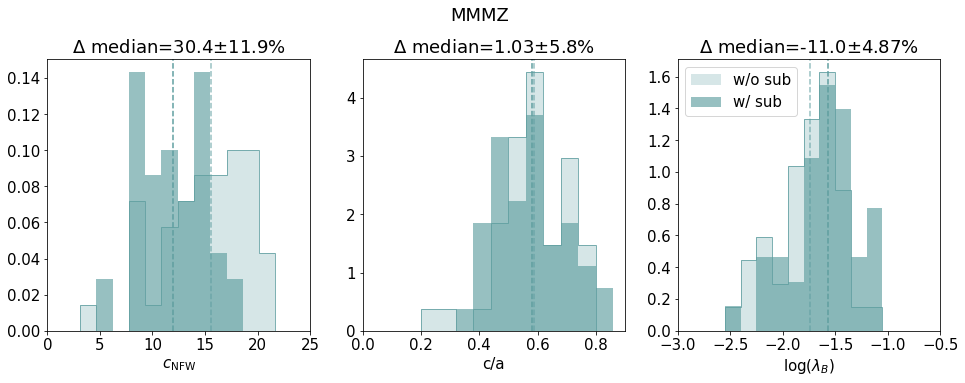

In [11]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
n_samples = len(df_all)
print(n_samples)

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('MMMZ',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
color = 'cadetblue'
bins = np.arange(0,25.0,1.55)

ax1.hist(df_ns['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
ax1.set_xlim(0,25)
#ax1.hist(df_all['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color=color)
#ax1.hist(df_ns['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color=color)
ax1.axvline(np.median(df_all['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns['calc_cs']),linestyle = '--',color=color,alpha=0.65)
diff = -100*(np.median((df_all['calc_cs']))-np.median((df_ns['calc_cs'])))/np.median((df_all['calc_cs']))

print(mannwhitneyu(df_ns['calc_cs'], df_all['calc_cs']))
print("med all: ",np.median(df_all['calc_cs']),iqr((df_all['calc_cs'])))
print("med host: ",np.median(df_ns['calc_cs']),iqr((df_ns['calc_cs'])))


err_margin = 100*get_med_shift_err(df_all['calc_cs'],df_ns['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax1.set_title(textstr)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.2,0.9,0.06)
ax2.hist(df_ns['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns['calc_shape'],alpha=0.8,bins=bins,density=True,color=color,histtype='step')
ax2.hist(df_all['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_ns['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,label='w/o sub',color=color)
ax2.axvline(np.median(df_all['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns['calc_shape']),linestyle = '--',color=color,alpha=0.65)

print(mannwhitneyu(df_ns['calc_shape'], df_all['calc_shape']))
print("med all: ",np.median(df_all['calc_shape']),iqr((df_all['calc_shape'])))
print("med host: ",np.median(df_ns['calc_shape']),iqr((df_ns['calc_shape'])))

diff = -100*(np.median((df_all['calc_shape']))-np.median((df_ns['calc_shape'])))/np.median((df_all['calc_shape']))
err_margin = 100*get_med_shift_err((df_all['calc_shape']),(df_ns['calc_shape']),n_smpls=43)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,2),round(err_margin,2))
ax2.set_xlim(0.0,0.9)
ax2.set_title(textstr)
ax2.set_xlabel('c/a')

bins = np.arange(-3.0,-1,0.15)
ax3.hist(np.log10(df_ns['calc_spin']),alpha=0.25,bins = bins, label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns['calc_spin']),alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all['calc_spin']),alpha=0.65,bins = bins,density=True,label='w/ sub',color=color)
#ax3.hist(np.log10(df_all['calc_spin']),histtype='step',alpha=0.5,bins = bins,density=True,color=color)
#ax3.hist(np.log10(df_ns['calc_spin']),histtype='step',alpha=0.5,bins = bins,density=True,color=color)
ax3.axvline(np.median(np.log10(df_all['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns['calc_spin'])),linestyle = '--',color=color,alpha=0.65)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
#diff = 100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))

print(mannwhitneyu(np.log10(df_ns['calc_spin']), np.log10(df_all['calc_spin'])))
print("med all: ",np.median(np.log10(df_all['calc_spin'])),iqr(np.log10(df_all['calc_spin'])))
print("med host: ",np.median(np.log10(df_ns['calc_spin'])),iqr(np.log10(df_ns['calc_spin'])))

diff = 100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all['calc_spin']),np.log10(df_ns['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
ax3.set_xlim(-3.,-0.5)
ax3.set_title(textstr)
ax3.legend()
#plt.savefig('mwm_host_ws_wos_compare.png',bbox_inches='tight')

MannwhitneyuResult(statistic=1370.0, pvalue=0.003965627483889394)
all med, iqr:  11.909956605234079 5.344137156754728
host med, iqr:  14.4624947723361 6.403024291630718
MannwhitneyuResult(statistic=1109.0, pvalue=0.43852212746937713)
all med, iqr:  0.5811771154166128 0.18743281623568003
host med, iqr:  0.5859280160266159 0.16090414872120817
MannwhitneyuResult(statistic=1656.0, pvalue=2.1163381541293504e-07)
all med, iqr:  -1.564942073342813 0.32379881019986967
host med, iqr:  -1.1571219979506115 0.34590245688194243


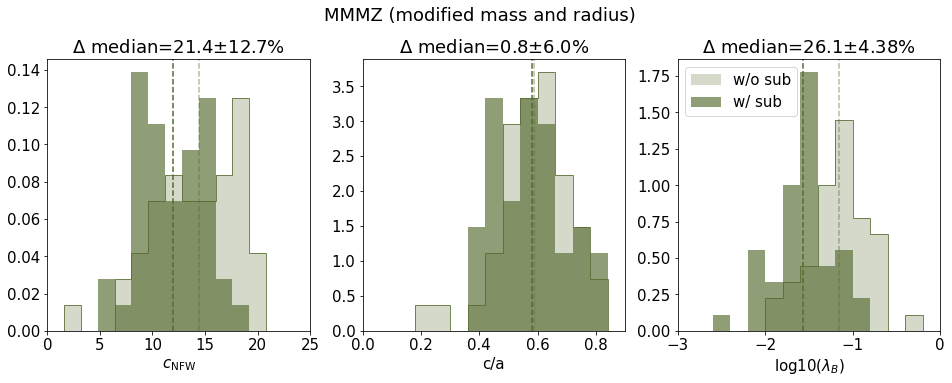

In [153]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
color='darkolivegreen'

n_samples = len(df_all)
rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('MMMZ (modified mass and radius)',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
bins = np.arange(0,25.0,1.6)

ax1.hist(df_ns_mwm_rm_new_rvir['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns_mwm_rm_new_rvir['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
ax1.axvline(np.median(df_all['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns_mwm_rm_new_rvir['calc_cs']),linestyle = '--',color=color,alpha=0.45)
ax1.set_xlim(0,25)

print(mannwhitneyu(df_ns_mwm_rm_new_rvir['calc_cs'], df_all['calc_cs']))
print("all med, iqr: ",np.median(df_all['calc_cs']),iqr((df_all['calc_cs'])))
print("host med, iqr: ",np.median(df_ns_mwm_rm_new_rvir['calc_cs']),iqr((df_ns_mwm_rm_new_rvir['calc_cs'])))


diff = 100*(np.median(df_all['calc_cs'])-np.median(df_ns_mwm_rm_new_rvir['calc_cs']))/np.median(df_all['calc_cs'])
err1 = np.sqrt( np.std(df_all['calc_cs'])**2 + np.std(df_ns_mwm_rm_new_rvir['calc_cs'])**2 )
err2 = diff*np.sqrt( (err1/(np.median(df_all['calc_cs'])-np.median(df_ns_mwm_rm_new_rvir['calc_cs'])))**2+ (np.std(df_all['calc_cs'])/np.median(df_all['calc_cs']))**2 )
diff = -100*(np.median((df_all['calc_cs']))-np.median((df_ns_mwm_rm_new_rvir['calc_cs'])))/np.median((df_all['calc_cs']))
err_margin = 100*get_med_shift_err(df_all['calc_cs'],df_ns_mwm_rm_new_rvir['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax1.set_title(textstr)#,fontsize=15)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.0,0.9,0.06)
ax2.hist(df_ns_mwm_rm_new_rvir['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns_mwm_rm_new_rvir['calc_shape'],alpha=0.8,bins=bins,density=True,label='w/o sub',color=color,histtype='step')
ax2.hist(df_all['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax2.hist(df_ns_mwm_rm_new_rvir['calc_shape'],histtype='step',alpha=0.25,bins=bins,density=True,color='#74a9cf')
ax2.axvline(np.median(df_all['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns_mwm_rm_new_rvir['calc_shape']),linestyle = '--',color=color,alpha=0.45)
diff = 100*(np.median(df_all['calc_shape'])-np.median(df_ns_mwm_rm_new_rvir['calc_shape']))/np.median(df_all['calc_shape'])
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_xlim(0.,0.9)

print(mannwhitneyu(df_ns_mwm_rm_new_rvir['calc_shape'], df_all['calc_shape']))
print("all med, iqr: ",np.median(df_all['calc_shape']),iqr(df_all['calc_shape']))
print("host med, iqr: ",np.median(df_ns_mwm_rm_new_rvir['calc_shape']),iqr(df_ns_mwm_rm_new_rvir['calc_shape']))

diff = -100*(np.median((df_all['calc_shape']))-np.median((df_ns_mwm_rm_new_rvir['calc_shape'])))/np.median((df_all['calc_shape']))
err_margin = 100*get_med_shift_err(df_all['calc_shape'],df_ns_mwm_rm_new_rvir['calc_shape'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))

ax2.set_title(textstr)#,fontsize=15)

bins = np.arange(-3.0,0.0,0.2)
ax3.hist(np.log10(df_ns_mwm_rm_new_rvir['calc_spin']),alpha=0.25,bins=bins,label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns_mwm_rm_new_rvir['calc_spin']),alpha=.8,bins=bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all['calc_spin']),alpha=.65,bins=bins,density=True,label='w/ sub',color=color)

#ax3.hist(np.log10(df_all['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax3.hist(np.log10(df_ns_mwm_rm_new_rvir['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#74a9cf')
ax3.set_xlabel('log10($\lambda_{B}$)',fontsize=15)

print(mannwhitneyu(np.log10(df_ns_mwm_rm_new_rvir['calc_spin']), np.log10(df_all['calc_spin'])))
print("all med, iqr: ",np.median(np.log10(df_all['calc_spin'])),iqr(np.log10(df_all['calc_spin'])))
print("host med, iqr: ",np.median(np.log10(df_ns_mwm_rm_new_rvir['calc_spin'])),iqr(np.log10(df_ns_mwm_rm_new_rvir['calc_spin'])))

ax3.axvline(np.median(np.log10(df_all['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns_mwm_rm_new_rvir['calc_spin'])),linestyle = '--',color=color,alpha=0.45)
#diff = 100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns_mwm_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))

diff = 100*(np.median(np.log10(df_all['calc_spin']))-np.median(np.log10(df_ns_mwm_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all['calc_spin']),np.log10(df_ns_mwm_rm_new_rvir['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
ax3.set_xlim(-3,0.0)
ax3.set_title(textstr)
ax3.legend()
#plt.savefig('mwm_host_ws_wos_rm_compare_new_radii.png',bbox_inches='tight')

11.631828113876335


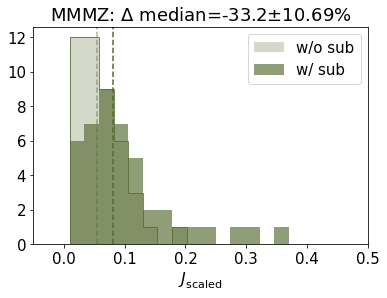

MannwhitneyuResult(statistic=675.0, pvalue=0.006538286039685845)
all med, iqr:  0.08128324458702609 0.06833107255121403
host med, iqr:  0.055184203679459316 0.0499676569943396


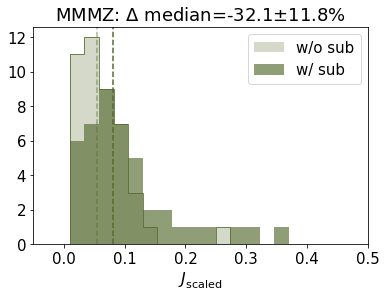

In [13]:
G = 4.302*(10**-9.) # in Mpc Msun^-1 (km/s)^2 
h = 0.7
threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##


color='darkolivegreen'

fixed_r = .2 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
print(np.log10(fixed_m))
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))
spin_unscale_all = np.sqrt(df_all["calc_Jx"]**2+df_all["calc_Jy"]**2+df_all["calc_Jz"]**2)#df_all['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_host = np.sqrt(df_ns_mwm_rm_new_rvir["calc_Jx"]**2+df_ns_mwm_rm_new_rvir["calc_Jy"]**2+df_ns_mwm_rm_new_rvir["calc_Jz"]**2)#df_ns_mwm_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*mwm_recalc_mvir**3.*mwm_recalc_rvir))

spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale

plt.figsize=(5,5)
bins = np.arange(0.01,.5,0.024)
plt.hist(spin_unscale_host,bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(spin_unscale_host,bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(spin_unscale_all,bins=bins,label='w/ sub',color=color,alpha=0.65)

plt.xlabel('$J^{}_{\mathrm{scaled}}$',fontsize=16)
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = 'MMMZ: $\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
plt.xlim(-.05,.5)
#plt.savefig('mwm_ang_mom_ws_wos_compare_modified_rvir.png',bbox_inches = 'tight',dpi=200)
plt.show()

##### OG HOST RVIR #######

plt.figsize=(5,5)
fixed_r = 0.2 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = np.sqrt(2.*G*fixed_m**3.*fixed_r)

#spin_unscale_host = df_ns['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_host = np.sqrt(df_ns["calc_Jx"]**2+df_ns["calc_Jy"]**2+df_ns["calc_Jz"]**2)
spin_unscale_all = np.sqrt(df_all["calc_Jx"]**2+df_all["calc_Jy"]**2+df_all["calc_Jz"]**2)
#spin_unscale_all = df_all['calc_spin']*(np.sqrt(2.*G*df_og_mmmz['mvir']**3.*df_og_mmmz['rvir']*1e-3))
spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale
print(mannwhitneyu(spin_unscale_host, spin_unscale_all))

plt.figsize=(5,5)
plt.hist(spin_unscale_host,label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(spin_unscale_host,histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(spin_unscale_all,label='w/ sub',color=color,bins=bins,alpha=0.65)
plt.xlabel('$J^{}_{\mathrm{scaled}}$',fontsize=16)
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = 'MMMZ: $\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1))
plt.title(textstr)
plt.axvline(np.median(spin_unscale_host),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median(spin_unscale_all),linestyle = '--',color=color)
print("all med, iqr: ",np.median(spin_unscale_all),iqr(spin_unscale_all))
print("host med, iqr: ",np.median(spin_unscale_host),iqr(spin_unscale_host))

plt.xlim(-.05,.5)
#plt.savefig('mwm_ang_mom_ws_wos_compare.png',bbox_inches = 'tight',dpi=200)
plt.show()

In [10]:
def correct_c(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction = 1.20*sub_mass + 0.231 #binned
        #correction = 0.914*sub_mass + 0.241 #no bins

    elif data == 'rhap':

        correction = 2.396*sub_mass+0.288 #0.2 sub mass cutoff, binned
        #correction = 2.22*sub_mass + 0.334 #0.5 sub mass cutoff, no bin

    return w_subs+correction*w_subs

def correct_shape(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction = 0.69*sub_mass -0.0136 #0.2 cut binned
        #correction = 0.638*sub_mass -0.00960 #no bins

    elif data == 'rhap':
        correction = 0.745*sub_mass-0.037 #0.2 sub mass cutoff, binned
        #correction = 0.852*sub_mass - 0.0512 #0.5 sub mass cutoff, no bin

    return w_subs+correction*w_subs


def correct_spin(w_subs,sub_mass,data = 'mw'):
    if data == 'mw':
        correction = 0.259 * sub_mass + 0.0631 #binned
        #correction = 1.39*sub_mass + 0.0344 # no bins

    elif data == 'rhap':
        correction = 0.895*sub_mass +0.061 #0.2 sub mass cutoff binned
        #correction = 1.02*sub_mass + 0.0475 #0.5 sub mass cutoff, no bin

    return w_subs + correction*w_subs



RMSE:  1.545
med change:  -0.022471484256138704


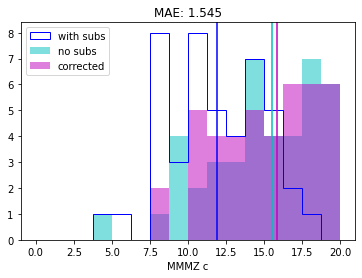

RMSE:  0.06987
med change:  0.005078254714078


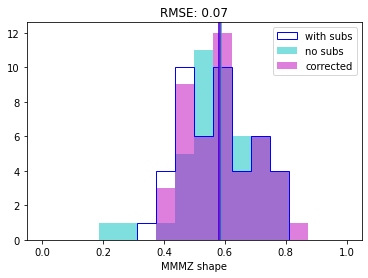

RMSE:  0.227
med change:  0.029238197147685618


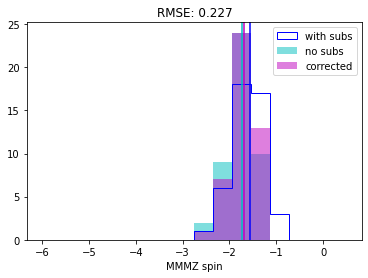

In [11]:
bins = np.linspace(0,20,17)
plt.hist((df_all['calc_cs']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all['calc_cs'])),color='b')
plt.hist((df_ns['calc_cs']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns['calc_cs'])),color='c')
corrected_c = correct_c(df_all['calc_cs'],mass_frac_mmmz)
plt.hist(correct_c(df_all['calc_cs'],mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_c((df_all['calc_cs']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('MAE: {}'.format(round(mean_squared_error(df_ns['calc_cs'],corrected_c,squared=False),3)))
plt.xlabel('MMMZ c')
print('RMSE: ',round(mean_squared_error(df_ns['calc_cs'],corrected_c,squared=False),3))
print('med change: ',(np.median(df_ns['calc_cs'])-np.median(corrected_c))/np.median(df_ns['calc_cs']))
plt.show()

bins = np.linspace(0,1,17)
plt.hist((df_all['calc_shape']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all['calc_shape'])),color='b')
plt.hist((df_ns['calc_shape']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns['calc_shape'])),color='c')
corrected_shape=correct_shape((df_all['calc_shape']),mass_frac_mmmz)
plt.hist(correct_shape((df_all['calc_shape']),mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_shape((df_all['calc_shape']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns['calc_shape'],corrected_shape,squared=False),3)))
plt.xlabel('MMMZ shape')
print('RMSE: ',round(mean_squared_error(df_ns['calc_shape'],corrected_shape,squared=False),5))
print('med change: ',(np.median(df_ns['calc_shape'])-np.median(corrected_shape))/np.median(df_ns['calc_shape']))
plt.show()



bins = np.linspace(-6,0.5,17)
plt.hist(np.log10(df_all['calc_spin']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median(np.log10(df_all['calc_spin'])),color='b')
plt.hist(np.log10(df_ns['calc_spin']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median(np.log10(df_ns['calc_spin'])),color='c')
corrected_spin = correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz)
plt.hist(correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_spin(np.log10(df_all['calc_spin']),mass_frac_mmmz)),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(np.log10(df_ns['calc_spin']),corrected_spin,squared = False),3)))
print('RMSE: ',round(mean_squared_error(np.log10(df_ns['calc_spin']),corrected_spin,squared = False),3))
print('med change: ',(np.median(np.log10(df_ns['calc_spin']))-np.median(corrected_spin))/np.median(np.log10(df_ns['calc_spin'])))
plt.xlabel('MMMZ spin')
plt.show()


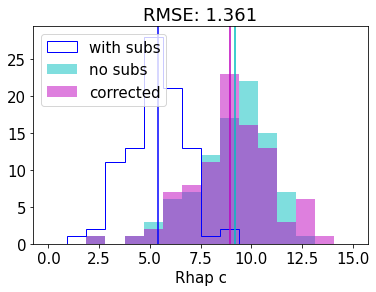

RMSE: 1.361
med change:  0.027884220089579314



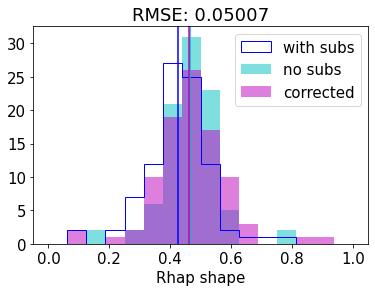

RMSE: 0.05007
med change:  0.008368687047845422

RMSE:  0.273
med change:  0.03261497733129454


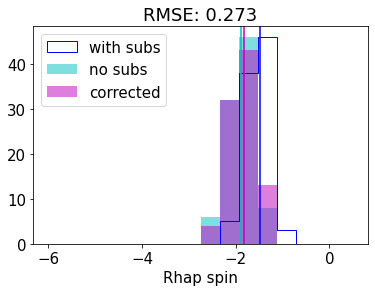

In [202]:
bins = np.linspace(0,15,17)
plt.hist((df_all_rhap_rm['calc_cs']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all_rhap_rm['calc_cs'])),color='b')
plt.hist((df_ns_rhap_rm['calc_cs']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns_rhap_rm['calc_cs'])),color='c')

corrected_c = correct_c(df_all_rhap_rm['calc_cs'],mass_frac_rhap,'rhap')
plt.hist(corrected_c,alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_c((df_all_rhap_rm['calc_cs']),mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_cs'],corrected_c,squared=False),3)))
plt.xlabel('Rhap c')
plt.show()
print('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_cs'],corrected_c,squared=False),3)))
print('med change: ',(np.median(df_ns_rhap_rm['calc_cs'])-np.median(corrected_c))/np.median(df_ns_rhap_rm['calc_cs']))
print()

bins = np.linspace(0,1,17)
plt.hist((df_all_rhap_rm['calc_shape']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median((df_all_rhap_rm['calc_shape'])),color='b')
plt.hist((df_ns_rhap_rm['calc_shape']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median((df_ns_rhap_rm['calc_shape'])),color='c')


corrected_shape = correct_shape(df_all_rhap_rm['calc_shape'],mass_frac_rhap,'rhap')
plt.hist(correct_shape((df_all_rhap_rm['calc_shape']),mass_frac_rhap,'rhap'),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_shape(df_all_rhap_rm['calc_shape'],mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_shape'],corrected_shape,squared=False),5)))
plt.xlabel('Rhap shape')
plt.show()

print('RMSE: {}'.format(round(mean_squared_error(df_ns_rhap_rm['calc_shape'],corrected_shape,squared=False),5)))
print('med change: ',(np.median(df_ns_rhap_rm['calc_shape'])-np.median(corrected_shape))/np.median(df_ns_rhap_rm['calc_shape']))

print()
bins = np.linspace(-6,0.5,17)
plt.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',label='with subs',color='b',bins=bins)
plt.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),color='b')
plt.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.5,label='no subs',color='c',bins=bins)
plt.axvline(np.median(np.log10(df_ns_rhap_rm['calc_spin'])),color='c')

corrected_spin = correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap')
plt.hist(correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap'),alpha=0.5,label='corrected',color='m',bins=bins)
plt.axvline(np.median(correct_spin(np.log10(df_all_rhap_rm['calc_spin']),mass_frac_rhap,'rhap')),color='m')
plt.legend()
plt.title('RMSE: {}'.format(round(mean_squared_error(np.log10(df_ns_rhap_rm['calc_spin']),corrected_spin,squared = False),3)))
print('RMSE: ',round(mean_squared_error(np.log10(df_ns_rhap_rm['calc_spin']),corrected_spin,squared = False),3))
print('med change: ',(np.median(np.log10(df_ns_rhap_rm['calc_spin']))-np.median(corrected_spin))/np.median(np.log10(df_ns_rhap_rm['calc_spin'])))
plt.xlabel('Rhap spin')
plt.show()



MannwhitneyuResult(statistic=7910.0, pvalue=2.4228362960789422e-24)
all med, iqr:  5.406746542371018 1.9058912011002445
host med, iqr:  9.20832754515128 2.4562215510373475
MannwhitneyuResult(statistic=5390.0, pvalue=0.001353747988382264)
all med, iqr:  0.42515325946367666 0.10718027031375077
host med, iqr:  0.4663490746310843 0.0886116744545899


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


MannwhitneyuResult(statistic=1309.0, pvalue=5.945585539849897e-16)
all med, iqr:  -1.4918370349320984 0.2812732911927083
host med, iqr:  -1.8866232647734549 0.3038638118964918


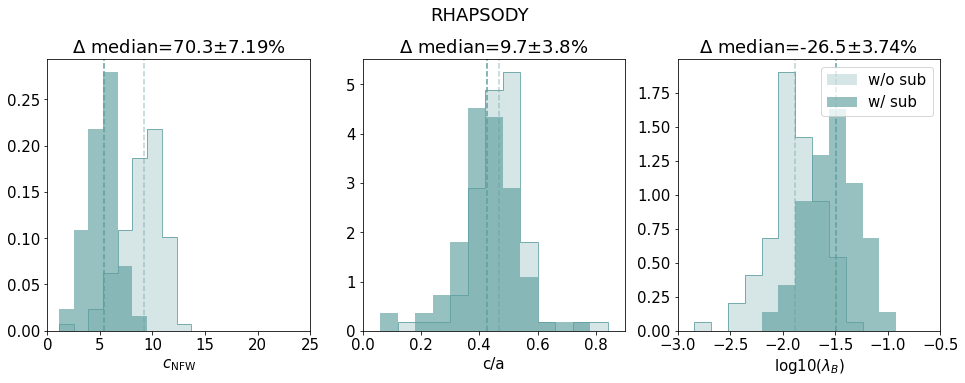

In [75]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
color='cadetblue'
n_samples = len(df_all_rhap_rm)
rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('RHAPSODY',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
bins = np.arange(min(df_all_rhap_rm['calc_cs']),15.0,1.4)

ax1.hist(df_ns_rhap_rm['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns_rhap_rm['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all_rhap_rm['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
#ax1.hist(df_all_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#810f7c')
#ax1.hist(df_ns_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#74a9cf')
ax1.axvline(np.median(df_all_rhap_rm['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns_rhap_rm['calc_cs']),linestyle = '--',color=color,alpha=0.45)
ax1.set_xlim(0,25)

print(mannwhitneyu(df_ns_rhap_rm['calc_cs'], df_all_rhap_rm['calc_cs']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_cs']),iqr((df_all_rhap_rm['calc_cs'])))
print("host med, iqr: ",np.median(df_ns_rhap_rm['calc_cs']),iqr((df_ns_rhap_rm['calc_cs'])))


diff = 100*(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm['calc_cs']))/np.median(df_all_rhap_rm['calc_cs'])
err1 = np.sqrt( np.std(df_all_rhap_rm['calc_cs'])**2 + np.std(df_ns_rhap_rm['calc_cs'])**2 )
err2 = diff*np.sqrt( (err1/(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm['calc_cs'])))**2+ (np.std(df_all_rhap_rm['calc_cs'])/np.median(df_all_rhap_rm['calc_cs']))**2 )
diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))

ax1.set_title(textstr)#,fontsize=15)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.0,0.9,0.06)
ax2.hist(df_ns_rhap_rm['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns_rhap_rm['calc_shape'],alpha=0.8,bins=bins,density=True,label='w/o sub',color=color,histtype='step')
ax2.hist(df_all_rhap_rm['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all_rhap_rm['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax2.hist(df_ns_rhap_rm['calc_shape'],histtype='step',alpha=0.25,bins=bins,density=True,color='#74a9cf')
ax2.axvline(np.median(df_all_rhap_rm['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns_rhap_rm['calc_shape']),linestyle = '--',color=color,alpha=0.45)
diff = 100*(np.median(df_all_rhap_rm['calc_shape'])-np.median(df_ns_rhap_rm['calc_shape']))/np.median(df_all_rhap_rm['calc_shape'])
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_xlim(0.,0.9)

print(mannwhitneyu(df_ns_rhap_rm['calc_shape'], df_all_rhap_rm['calc_shape']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_shape']),iqr(df_all_rhap_rm['calc_shape']))
print("host med, iqr: ",np.median(df_ns_rhap_rm['calc_shape']),iqr(df_ns_rhap_rm['calc_shape']))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))

ax2.set_title(textstr)#,fontsize=15)

bins = np.arange(-3.0,-0.5,0.16)
ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.25,bins=bins,label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),alpha=.8,bins=bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),alpha=.65,bins=bins,density=True,label='w/ sub',color=color)

#ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax3.hist(np.log10(df_ns_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#74a9cf')
ax3.set_xlabel('log10($\lambda_{B}$)',fontsize=15)

cut = np.argsort(rhap_mass_scale)[0:n_samples]

print(mannwhitneyu(np.log10(df_ns_rhap_rm['calc_spin']), np.log10(df_all_rhap_rm['calc_spin'])))
print("all med, iqr: ",np.median(np.log10(df_all_rhap_rm['calc_spin'])),iqr(np.log10(df_all_rhap_rm['calc_spin'])))
print("host med, iqr: ",np.median(np.log10(df_ns_rhap_rm['calc_spin'])),iqr(np.log10(df_ns_rhap_rm['calc_spin'])))

ax3.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns_rhap_rm['calc_spin'])),linestyle = '--',color=color,alpha=0.45)
#diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))

diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
ax3.set_xlim(-3,-0.5)
ax3.set_title(textstr)
ax3.legend()
#plt.savefig('rhap_host_ws_wos_rm_compare.png',bbox_inches='tight',dpi=200)

MannwhitneyuResult(statistic=6990.0, pvalue=2.2819241535727197e-14)
all med, iqr:  5.406746542371018 1.9058912011002445
host med, iqr:  7.51127116006088 2.31509937858186
MannwhitneyuResult(statistic=5214.0, pvalue=0.00658546984476499)
all med, iqr:  0.42515325946367666 0.10718027031375077
host med, iqr:  0.46786747258427597 0.07666250792522405
MannwhitneyuResult(statistic=7206.0, pvalue=1.8471121356351126e-16)
all med, iqr:  -1.4918370349320984 0.2812732911927083
host med, iqr:  -1.1579216757198636 0.32106131782256375


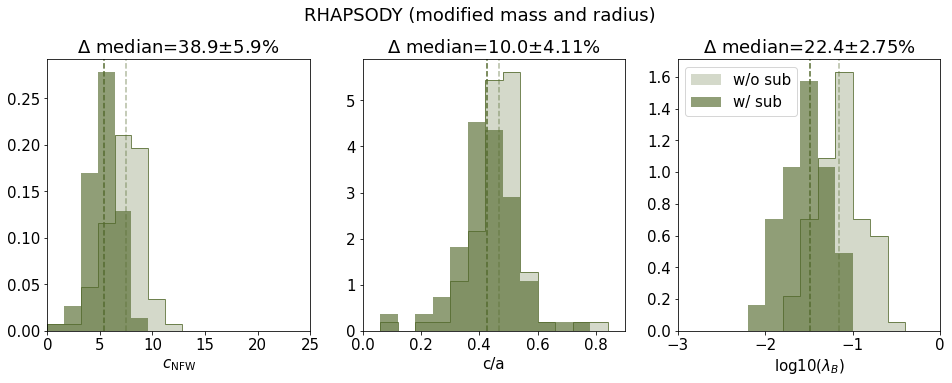

In [162]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
color='darkolivegreen'

n_samples = len(df_all_rhap_rm)
rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,5))
fig.suptitle('RHAPSODY (modified mass and radius)',y=1.025)
plt.rcParams['axes.facecolor'] = '1.'
bins = np.arange(0,25.0,1.6)
ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],alpha=0.25,bins = bins,label='Subs Excluded',density=True,color=color)
ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],alpha=0.8,bins = bins,density=True,color=color,histtype='step')
ax1.hist(df_all_rhap_rm['calc_cs'],alpha=0.65,bins = bins,density=True,label='Subs Included',color=color)
#ax1.hist(df_all_rhap_rm['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#810f7c')
#ax1.hist(df_ns_rhap_rm_new_rvir['calc_cs'],histtype='step',alpha=0.5,bins = bins,density=True,color='#74a9cf')
ax1.axvline(np.median(df_all_rhap_rm['calc_cs']),linestyle = '--',color=color)
ax1.axvline(np.median(df_ns_rhap_rm_new_rvir['calc_cs']),linestyle = '--',color=color,alpha=0.45)
ax1.set_xlim(0,25)

print(mannwhitneyu(df_ns_rhap_rm_new_rvir['calc_cs'], df_all_rhap_rm['calc_cs']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_cs']),iqr((df_all_rhap_rm['calc_cs'])))
print("host med, iqr: ",np.median(df_ns_rhap_rm_new_rvir['calc_cs']),iqr((df_ns_rhap_rm_new_rvir['calc_cs'])))


diff = 100*(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm_new_rvir['calc_cs']))/np.median(df_all_rhap_rm['calc_cs'])
err1 = np.sqrt( np.std(df_all_rhap_rm['calc_cs'])**2 + np.std(df_ns_rhap_rm_new_rvir['calc_cs'])**2 )
err2 = diff*np.sqrt( (err1/(np.median(df_all_rhap_rm['calc_cs'])-np.median(df_ns_rhap_rm_new_rvir['calc_cs'])))**2+ (np.std(df_all_rhap_rm['calc_cs'])/np.median(df_all_rhap_rm['calc_cs']))**2 )
diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm_new_rvir['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm_new_rvir['calc_cs'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))

ax1.set_title(textstr)#,fontsize=15)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)

bins = np.arange(0.0,0.9,0.06)
ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],alpha=0.25,bins=bins,density=True,label='w/o sub',color=color)
ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],alpha=0.8,bins=bins,density=True,label='w/o sub',color=color,histtype='step')
ax2.hist(df_all_rhap_rm['calc_shape'],alpha=0.65,bins=bins,density=True,label='w/ sub',color=color)
#ax2.hist(df_all_rhap_rm['calc_shape'],histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax2.hist(df_ns_rhap_rm_new_rvir['calc_shape'],histtype='step',alpha=0.25,bins=bins,density=True,color='#74a9cf')
ax2.axvline(np.median(df_all_rhap_rm['calc_shape']),linestyle = '--',color=color)
ax2.axvline(np.median(df_ns_rhap_rm_new_rvir['calc_shape']),linestyle = '--',color=color,alpha=0.45)
diff = 100*(np.median(df_all_rhap_rm['calc_shape'])-np.median(df_ns_rhap_rm_new_rvir['calc_shape']))/np.median(df_all_rhap_rm['calc_shape'])
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_xlim(0.,0.9)

print(mannwhitneyu(df_ns_rhap_rm_new_rvir['calc_shape'], df_all_rhap_rm['calc_shape']))
print("all med, iqr: ",np.median(df_all_rhap_rm['calc_shape']),iqr(df_all_rhap_rm['calc_shape']))
print("host med, iqr: ",np.median(df_ns_rhap_rm_new_rvir['calc_shape']),iqr(df_ns_rhap_rm_new_rvir['calc_shape']))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm_new_rvir['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm_new_rvir['calc_shape'],n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))

ax2.set_title(textstr)#,fontsize=15)

bins = np.arange(-3.0,0.0,0.2)
ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),alpha=0.25,bins=bins,label='w/o sub',density=True,color=color)
ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),alpha=.8,bins=bins,density=True,color=color,histtype='step')
ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),alpha=.65,bins=bins,density=True,label='w/ sub',color=color)

#ax3.hist(np.log10(df_all_rhap_rm['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#810f7c')
#ax3.hist(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),histtype='step',alpha=0.5,bins=bins,density=True,color='#74a9cf')
ax3.set_xlabel('log10($\lambda_{B}$)',fontsize=15)

cut = np.argsort(rhap_mass_scale)[0:n_samples]

print(mannwhitneyu(np.log10(df_ns_rhap_rm_new_rvir['calc_spin']), np.log10(df_all_rhap_rm['calc_spin'])))
print("all med, iqr: ",np.median(np.log10(df_all_rhap_rm['calc_spin'])),iqr(np.log10(df_all_rhap_rm['calc_spin'])))
print("host med, iqr: ",np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])),iqr(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))

ax3.axvline(np.median(np.log10(df_all_rhap_rm['calc_spin'])),linestyle = '--',color=color)
ax3.axvline(np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])),linestyle = '--',color=color,alpha=0.45)
#diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))

diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm_new_rvir['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),n_smpls=n_samples)
textstr = '$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
ax3.set_xlim(-3,0.0)
ax3.set_title(textstr)
ax3.legend()
#plt.savefig('rhap_host_ws_wos_rm_compare_new_radii.png',bbox_inches='tight',dpi=200)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


14.420084891019213


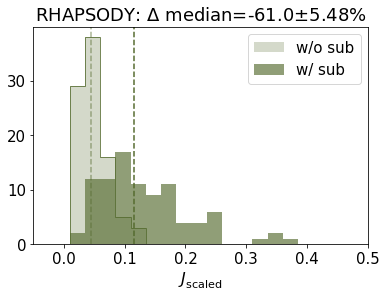

14.420084891019213
MannwhitneyuResult(statistic=1313.0, pvalue=6.511084395967572e-16)
all med, iqr:  0.11547380138669319 0.092557676868256
host med, iqr:  0.05008910576315554 0.04208824940761619


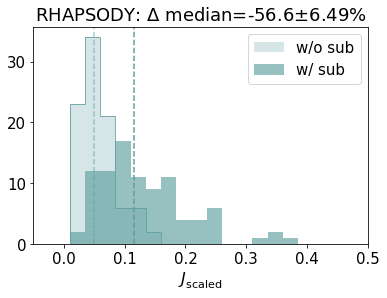

In [12]:
G = 4.302*(10**-9.) # in Mpc Msun^-1 (km/s)^2 
h = 0.7
threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##


color='darkolivegreen'
#spin_unscale_all = df_all_rhap_rm['calc_spin']*(np.sqrt(2.*G*df_all_rhap_rock['mvir']**3.*df_all_rhap_rock['rvir']*1e-3))
#spin_unscale_host = df_ns_rhap_rm_new_rvir['calc_spin']*(np.sqrt(2.*G*rhap_recalc_mvir**3.*rhap_recalc_rvir))

spin_unscale_all = np.sqrt(df_all_rhap_rm['calc_Jx']**2+df_all_rhap_rm['calc_Jy']**2+df_all_rhap_rm['calc_Jz']**2)
spin_unscale_host = np.sqrt(df_ns_rhap_rm_new_rvir['calc_Jx']**2+df_ns_rhap_rm_new_rvir['calc_Jy']**2+df_ns_rhap_rm_new_rvir['calc_Jz']**2)

fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
print(np.log10(fixed_m))
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))

spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale

plt.figsize=(5,5)

bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,bins=bins,label='w/o sub',color=color,alpha=0.25)
plt.hist(spin_unscale_host,bins=bins,histtype='step',color=color,alpha=0.8)
plt.hist(spin_unscale_all,bins=bins,label='w/ sub',color=color,alpha=0.65)

plt.xlabel('$J^{}_{\mathrm{scaled}}$',fontsize=16)
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = 'RHAPSODY: $\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
plt.xlim(-.05,.5)
#plt.savefig('rhap_ang_mom_ws_wos_compare_modified_rvir.png', 
#           bbox_inches = 'tight', dpi=200)
plt.show()

##### OG HOST RVIR #######
color="cadetblue"
fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
print(np.log10(fixed_m))

fixed_scale = np.sqrt(2.*G*fixed_m**3.*fixed_r)

spin_unscale_all = np.sqrt(df_all_rhap_rm['calc_Jx']**2+df_all_rhap_rm['calc_Jy']**2+df_all_rhap_rm['calc_Jz']**2)
spin_unscale_host = np.sqrt(df_ns_rhap_rm['calc_Jx']**2+df_ns_rhap_rm['calc_Jy']**2+df_ns_rhap_rm['calc_Jz']**2)
spin_unscale_all = spin_unscale_all/fixed_scale
spin_unscale_host = spin_unscale_host/fixed_scale
print(mannwhitneyu(spin_unscale_host, spin_unscale_all))

plt.figsize=(5,5)
bins = np.arange(0.01,.5,0.025)
plt.hist(spin_unscale_host,label='w/o sub',color=color,alpha=0.25,bins=bins)
plt.hist(spin_unscale_host,histtype='step',color=color,alpha=0.8,bins=bins)
plt.hist(spin_unscale_all,label='w/ sub',color=color,bins=bins,alpha=0.65)
plt.xlabel('$J^{}_{\mathrm{scaled}}$',fontsize=16)
plt.legend()
diff = -100*(np.median(spin_unscale_all)-np.median(spin_unscale_host))/np.median(spin_unscale_all)
err_margin = 100*get_med_shift_err((spin_unscale_all),(spin_unscale_host),n_smpls=n_samples)
textstr = 'RHAPSODY: $\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,2))
plt.title(textstr)
plt.axvline(np.median((spin_unscale_host)),alpha=0.5,linestyle = '--',color=color)
plt.axvline(np.median((spin_unscale_all)),linestyle = '--',color=color)
print("all med, iqr: ",np.median(spin_unscale_all),iqr(spin_unscale_all))
print("host med, iqr: ",np.median(spin_unscale_host),iqr(spin_unscale_host))

plt.xlim(-.05,.5)
#plt.savefig('rhap_ang_mom_ws_wos_compare.png',bbox_inches = 'tight',dpi=200)
plt.show()

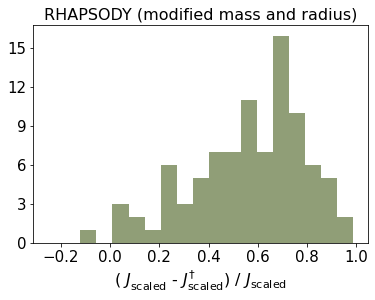

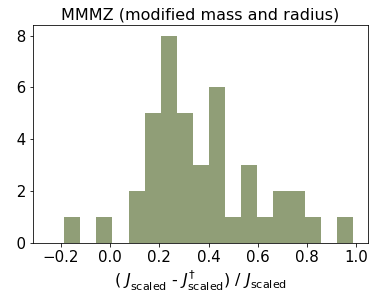

In [43]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 15})
plt.rcParams["mathtext.default"]

G = 4.302*(10**-9.) # in Mpc Msun^-1 (km/s)^2 
h = 0.7
threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##
n_samples = len(df_all_rhap_rm)

fixed_r = 1.7 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))

color='darkolivegreen'
spin_unscale_all = np.sqrt(df_all_rhap_rm['calc_Jx']**2+df_all_rhap_rm['calc_Jy']**2+df_all_rhap_rm['calc_Jz']**2)
spin_unscale_host = np.sqrt(df_ns_rhap_rm_new_rvir['calc_Jx']**2+df_ns_rhap_rm_new_rvir['calc_Jy']**2+df_ns_rhap_rm_new_rvir['calc_Jz']**2)

bins = np.arange(-0.25,1.,0.065)
plt.figsize=(5,5)
plt.hist((spin_unscale_all-spin_unscale_host)/spin_unscale_all,color=color,bins=bins,alpha=0.65)
plt.xlabel('( $J^{}_{\mathrm{scaled}}$ - $J^{\dagger}_{\mathrm{scaled}}$) / $J_{\mathrm{scaled}}$',fontsize=16)
plt.title("RHAPSODY (modified mass and radius)",fontsize=16)
plt.yticks(np.arange(0.0,15.5,3))

plt.savefig('rhap_ang_mom_diff_hist.png',dpi=200,bbox_inches = 'tight')
plt.show()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 15})
plt.rcParams["mathtext.default"]
plt.figsize=(5,5)


threshold_density = 94*2.7754e11*h**2 #94 x critical density ##M_sun/Mpc**3##
n_samples = len(df_all)

fixed_r = .2 #Mpc
fixed_m = 4*np.pi/3*threshold_density*fixed_r**3 #Solar Masses
fixed_scale = (np.sqrt(2.*G*fixed_m**3.*fixed_r))

color='darkolivegreen'
spin_unscale_all = np.sqrt(df_all['calc_Jx']**2+df_all['calc_Jy']**2+df_all['calc_Jz']**2)
spin_unscale_host = np.sqrt(df_ns_mwm_rm_new_rvir['calc_Jx']**2+df_ns_mwm_rm_new_rvir['calc_Jy']**2+df_ns_mwm_rm_new_rvir['calc_Jz']**2)

#bins = np.arange(-.01,.4,0.024)
plt.figsize=(5,5)
plt.hist((spin_unscale_all-spin_unscale_host)/spin_unscale_all,color=color,bins=bins,alpha=0.65)
plt.xlabel('( $J^{}_{\mathrm{scaled}}$ - $J^{\dagger}_{\mathrm{scaled}}$) / $J_{\mathrm{scaled}}$',fontsize=16)
plt.title("MMMZ (modified mass and radius)",fontsize=16)
plt.yticks(np.arange(0.0,8.5,2))
plt.gca().set_yticklabels(['  0',' 2',' 4',' 6', ' 8'])

plt.savefig('mwm_ang_mom_diff_hist.png',dpi=200,bbox_inches = 'tight')
plt.show()


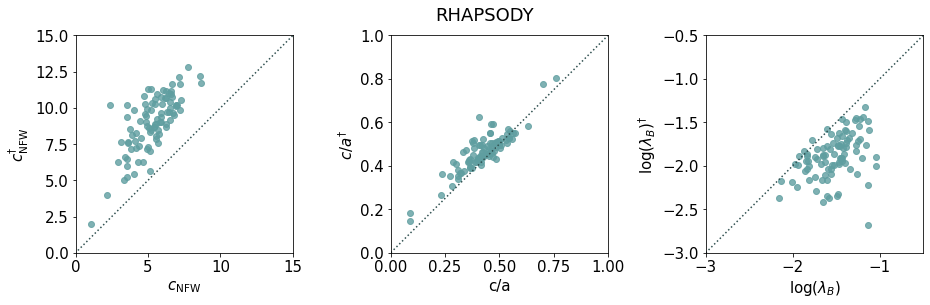

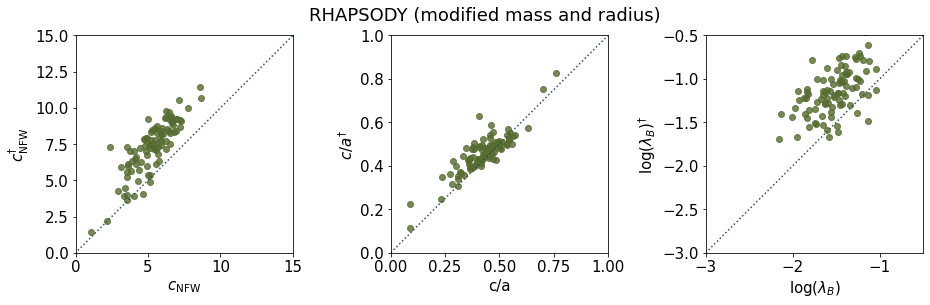

In [171]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('RHAPSODY')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'cadetblue'
line_color = 'darkslategray'

ax1.scatter(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,15],[-1,15],color=line_color,ls=':')
ax1.set_xlim(0,15)
ax1.set_ylim(0,15)
ax1.set_aspect('equal')

ax2.scatter(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_aspect('equal')

ax3.plot([-3,-0],[-3,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-3.,-0.5)
ax3.set_ylim(-3.,-0.5)
ax3.set_aspect('equal')

#plt.savefig('rhap_host_ws_wos_compare_scatter.png',bbox_inches='tight')
plt.show()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('RHAPSODY (modified mass and radius)')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'darkolivegreen'
line_color = 'darkslategray'

ax1.scatter(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm_new_rvir['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,15],[-1,15],color=line_color,ls=':')
ax1.set_xlim(0,15)
ax1.set_ylim(0,15)
ax1.set_aspect('equal')

ax2.scatter(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm_new_rvir['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_aspect('equal')

ax3.plot([-3,-0],[-3,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm_new_rvir['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-3.,-0.5)
ax3.set_ylim(-3.,-0.5)
ax3.set_aspect('equal')

plt.savefig('rhap_host_ws_wos_compare_scatter_new_rvir_mvir.png',bbox_inches='tight')

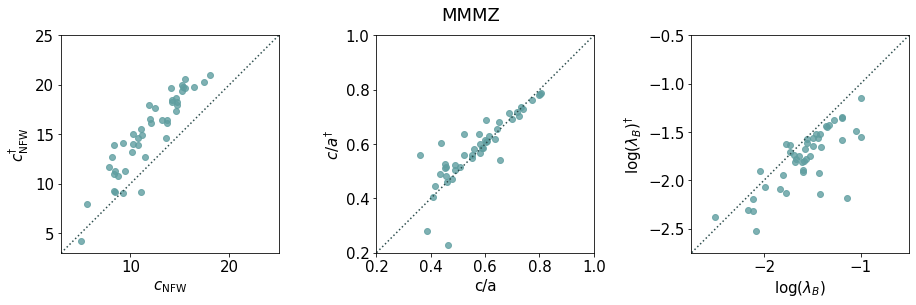

ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

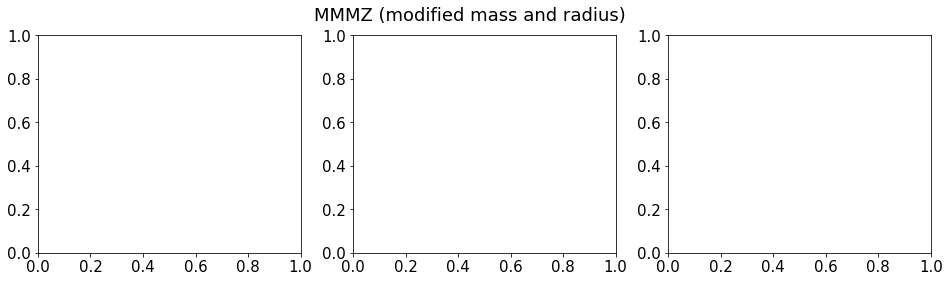

In [170]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('MMMZ')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'cadetblue'
line_color = 'darkslategray'

ax1.scatter(df_all['calc_cs'],df_ns['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,25],[-1,25],color=line_color,ls=':')
ax1.set_xlim(3,25)
ax1.set_ylim(3,25)
ax1.set_aspect('equal')

ax2.scatter(df_all['calc_shape'],df_ns['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0.2,1)
ax2.set_ylim(0.2,1)
ax2.set_aspect('equal')

ax3.plot([-5,0],[-5,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all['calc_spin']),np.log10(df_ns['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-2.75,-0.5)
ax3.set_ylim(-2.75,-0.5)
ax3.set_aspect('equal')

#plt.savefig('mwm_host_ws_wos_compare_scatter.png',bbox_inches='tight')
plt.show()

rc('font', **font)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))
fig.suptitle('MMMZ (modified mass and radius)')#,y=1.025)
plt.rcParams['axes.facecolor'] = '1.'

color = 'olivegreen'
line_color = 'darkslategray'
ax1.scatter(df_all['calc_cs'],df_ns_mwm_rm_new_rvir['calc_cs'],alpha=0.8,marker='o',color=color)
ax1.set_xlabel('$c_\mathrm{NFW}$',fontsize=15)
ax1.set_ylabel('$c_\mathrm{NFW}^{\dag}$',fontsize=15)
ax1.plot([-1,25],[-1,25],color=line_color,ls=':')
ax1.set_xlim(3,25)
ax1.set_ylim(3,25)
ax1.set_aspect('equal')

ax2.scatter(df_all['calc_shape'],df_ns_mwm_rm_new_rvir['calc_shape'],alpha=0.8,marker='o',color=color)
ax2.set_xlabel('c/a',fontsize=15)
ax2.set_ylabel('$c/a^{\dag}$',fontsize=15)
ax2.plot([-1,1],[-1,1],color=line_color,ls=':')
ax2.set_xlim(0.2,1)
ax2.set_ylim(0.2,1)
ax2.set_aspect('equal')

ax3.plot([-5,0],[-5,0],color=line_color,ls=':')
ax3.scatter(np.log10(df_all['calc_spin']),np.log10(df_ns_mwm_rm_new_rvir['calc_spin']),alpha=0.8,marker='o',color=color)
ax3.set_xlabel('log($\lambda_{B}$)',fontsize=15)
ax3.set_ylabel('log($\lambda_{B})^{\dag}$',fontsize=15)
ax3.set_xlim(-2.75,-0.5)
ax3.set_ylim(-2.75,-0.5)
ax3.set_aspect('equal')
plt.savefig('mwm_host_ws_wos_compare_scatter_new_rvir_mvir.png',bbox_inches='tight')

plt.show()

In [198]:
diff = 100*(np.median(np.log10(df_all_rhap_rm['calc_spin']))-np.median(np.log10(df_ns_rhap_rm['calc_spin'])))/np.median(np.log10(df_all_rhap_rm['calc_spin']))
err_margin = 100*get_med_shift_err(np.log10(df_all_rhap_rm['calc_spin']),np.log10(df_ns_rhap_rm['calc_spin']),96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

diff = -100*(np.median((df_all_rhap_rm['calc_cs']))-np.median((df_ns_rhap_rm['calc_cs'])))/np.median((df_all_rhap_rm['calc_cs']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_cs'],df_ns_rhap_rm['calc_cs'],96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

diff = -100*(np.median((df_all_rhap_rm['calc_shape']))-np.median((df_ns_rhap_rm['calc_shape'])))/np.median((df_all_rhap_rm['calc_shape']))
err_margin = 100*get_med_shift_err(df_all_rhap_rm['calc_shape'],df_ns_rhap_rm['calc_shape'],96)
print('$\Delta$ median={}$\pm${}$\%$'.format(round(diff,1),round(err_margin,1)))

$\Delta$ median=-26.5$\pm$3.6$\%$
$\Delta$ median=70.3$\pm$7.4$\%$
$\Delta$ median=9.7$\pm$3.9$\%$


In [113]:
def rlm(y,x,print_res=False):
    x = sm.add_constant(x) 
    huber_t = sm.RLM(y,x,M=sm.robust.norms.HuberT())
    hub_results = huber_t.fit()
    #print(hub_results.params)
    #print(hub_results.bse)
    #print(
    #hub_results.summary(
    #    yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    #))
    #print(hub_results.summary())
#)
    if print_res:
        #print(hub_results.params)
        #print(hub_results.bse)
        print(hub_results.summary())
    return hub_results

In [132]:
def boot(mass_frac, prop, bin_cens, n_bins = 9, n_samples = 250):

    step = int(np.floor(len(mass_frac)/n_bins))
    srtd = np.argsort(mass_frac)
    bin_meds = np.zeros((n_samples,n_bins))
    bin_stds = np.zeros((n_samples,n_bins))
    coefs = np.zeros(n_samples)
    intercepts = np.zeros(n_samples)

    for k in range(n_samples):
        j = 0
        for i in range(n_bins):
            if j > len(mass_frac):
                print("true")
                j=max(len(mass_frac))

            sample = np.random.choice(prop[srtd][j:j+step],len(prop[srtd][j:j+step]))
            bin_meds[k][i] += np.median(sample)
            bin_stds[k][i] += np.std(sample)
        
            j+=step
    
        huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds[k], sample_weight=1/bin_stds[k])
        coefs[k] += huber.coef_
        intercepts[k] += huber.intercept_

    return np.std(coefs),np.std(intercepts)


def boot2(mass_frac, prop, n=45, n_samples = 250):

    coefs = np.zeros(n_samples)
    intercepts = np.zeros(n_samples)

    for k in range(n_samples):
        j = 0
        sample = np.random.choice(prop,n)
        huber = HuberRegressor().fit(mass_frac.reshape(-1, 1), sample)#, sample_weight=1/bin_stds[k])
        coefs[k] += huber.coef_
        intercepts[k] += huber.intercept_

    return np.std(coefs),np.std(intercepts)
       
       

FRACTIONAL CHANGE(SUBHALO MASS FRACTION)
CONCENTRATION
SpearmanrResult(correlation=0.502088374458641, pvalue=3.4114411434112393e-07)
score:  0.7114805799442481
binned m,b:  [2.39588777] 0.28880886738763617
(0.5796588193835506, 0.0641471344974702)
##### NO BINS ######
score:  0.3331905820604931
no bin m,b:  [2.74188737] 0.2602316830468354
(0.4747164526901521, 0.08622111602977671)


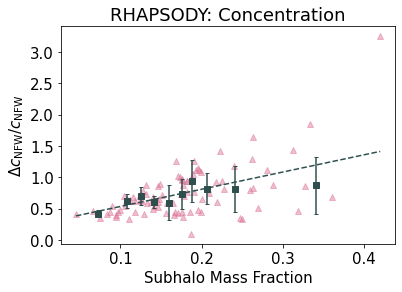

SHAPE
(0.48403201522488554, 1.0172659306551887e-06)
SpearmanrResult(correlation=0.47061634018155757, pvalue=2.2020112411732295e-06)
score:  0.6385844368791241
binned m,b:  [0.74514162] -0.036899489989765895
(0.31577744081744097, 0.039060401796173524)
###### NO BINS ######
score:  0.21232370280933854
no bin m,b:  [0.98652852] -0.0706147996299626
(0.17817946529367665, 0.03352473071963102)


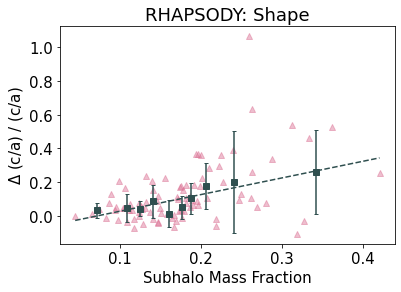

SPIN
SpearmanrResult(correlation=0.41564046052124587, pvalue=3.785442436502016e-05)
score:  0.4749917040086068
m,b: [0.89463675],0.06128453766050209
(0.3456399568070862, 0.05754722847904382)
##### NO BINS #####
score:  0.23101395469713681
no bin m,b:  [1.13821319] 0.02913047058367682
(0.27236593973437856, 0.05100467027694476)


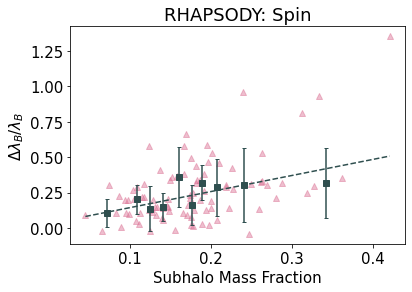

In [137]:
print("FRACTIONAL CHANGE(SUBHALO MASS FRACTION)")

srtd = np.argsort(mass_frac_rhap)
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])
n_samples = len(d_shape)
n_bins=10

print('CONCENTRATION')


plt.scatter(np.array(mass_frac_rhap),np.array(d_c)
        ,c='palevioletred',alpha=0.45,marker='^')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_rhap,d_c,n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)

print(spearmanr(d_c,mass_frac_rhap))

print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("binned m,b: ",huber.coef_,huber.intercept_)
print(boot(mass_frac_rhap, d_c, bin_cens, n_bins = n_bins, n_samples = 750))


#############
print('##### NO BINS ######')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_c)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), d_c))#, sample_weight=1/bin_stds))
print("no bin m,b: ",huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_rhap), d_c, n=len(d_c), n_samples = 250))

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),color='darkslategray',ls='--')

#huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_c)
#plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
#        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),'palevioletred',linestyle='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
#plt.ylim(.2,2.35)
plt.title('RHAPSODY: Concentration')
#plt.savefig('rhap_c_vs_mass_frac.png',bbox_inches='tight' )
plt.show()


print('SHAPE')

print(pearsonr(np.array(d_shape),np.array(mass_frac_rhap)))
print(spearmanr(np.array(d_shape),np.array(mass_frac_rhap)))

plt.scatter(np.array(mass_frac_rhap),np.array(d_shape),
        c='palevioletred',alpha=0.45,marker='^',label='early')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_rhap,d_shape,n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("binned m,b: ",huber.coef_,huber.intercept_)

print(boot(mass_frac_rhap, d_shape, bin_cens, n_bins = n_bins, n_samples = 750))

print('###### NO BINS ######')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), d_shape)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), d_shape))#, sample_weight=1/bin_stds))
print("no bin m,b: ",huber.coef_,huber.intercept_)

print(boot2(np.array(mass_frac_rhap), d_shape, n=len(d_c), n_samples = 250))

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,color='darkslategray',marker='s',
        ls='none',capsize=2,label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),color='darkslategray',ls='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$ (c/a) / (c/a)')
#plt.ylim(-.2,.9)
plt.title('RHAPSODY: Shape')
#plt.savefig('rhap_shape_vs_mass_frac.png',bbox_inches='tight')
plt.show()



########################
print('SPIN')

print(spearmanr(d_spin,mass_frac_rhap))

plt.scatter(np.array(mass_frac_rhap),np.array(d_spin),
       c='palevioletred',alpha=0.45,marker='^',label='early')


bin_meds, bin_cens, bin_stds = get_equal_bins(np.array(mass_frac_rhap),
        np.array(d_spin),n_bins=n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("m,b: {},{}".format(huber.coef_,huber.intercept_))

print(boot(np.array(mass_frac_rhap), np.array(d_spin), bin_cens, n_bins = n_bins, n_samples = 750))

print('##### NO BINS #####')
huber = HuberRegressor().fit(np.array(mass_frac_rhap).reshape(-1, 1), np.array(d_spin))#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_rhap).reshape(-1, 1), np.array(d_spin)))#, sample_weight=1/bin_stds))
print("no bin m,b: ",huber.coef_,huber.intercept_)


print(boot2(np.array(mass_frac_rhap), np.array(d_spin), n=len(np.array(d_spin)), n_samples = 250))

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,color='darkslategray',marker='s',capsize=2,
    ls = 'none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_rhap).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_rhap).reshape(-1, 1)),
        color='darkslategray',ls='--')

plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta\lambda_{B}$/$\lambda_{B}$ ')
#plt.set_ylim(-.45,1.05)
plt.title('RHAPSODY: Spin')
#plt.savefig('rhap_spin_vs_mass_frac.png',bbox_inches='tight')

plt.show()



FRACTIONAL CHANGE(SUBHALO MASS FRACTION)
Concentration
score:  0.7917565552789139
binned m,b : [1.20168049] 0.23079070607260666
no bins
score:  -0.05091855741084239
no bins m,b : [0.9136674] 0.24077593869745298
SpearmanrResult(correlation=0.41607378129117256, pvalue=0.0044731843727273115)


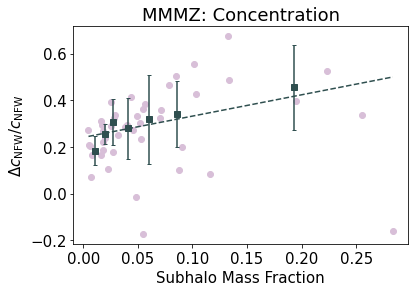

SHAPE
SpearmanrResult(correlation=0.4288537549407115, pvalue=0.0032887806512758785)
score:  0.8097149790699377
binned m,b : [0.69021013] -0.013581918456044322
no bins
score:  -0.05491046341614969
no bins m,b : [0.63821937] -0.00960180865188925


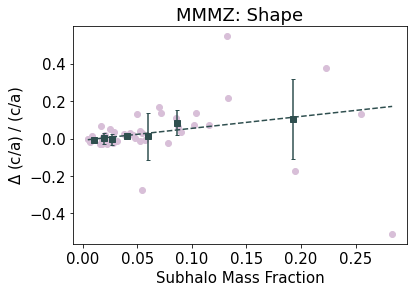

SPIN
score:  0.21139229711696528
binned m,b : [0.25977811] 0.06313723344205222
no bins
score:  0.36649202775935996
no bins m,b : [1.39224483] 0.034399743685836384
SpearmanrResult(correlation=0.4753623188405796, pvalue=0.0009670598868152643)


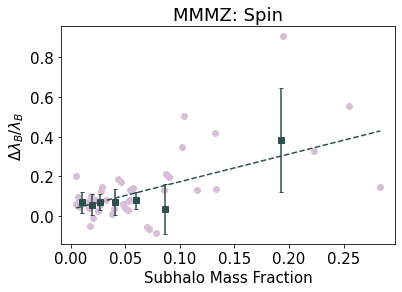

In [138]:
print("FRACTIONAL CHANGE(SUBHALO MASS FRACTION)")

n_bins = 7
d_shape = (df_ns['calc_shape']-df_all['calc_shape'])/df_all['calc_shape']
d_c = (df_ns['calc_cs']-df_all['calc_cs'])/df_all['calc_cs']
d_spin = (np.log10(df_ns['calc_spin'])-np.log10(df_all['calc_spin']))/np.log10(df_all['calc_spin'])
n_samples = len(d_spin)

print('Concentration')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_c,n_bins)

huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("binned m,b :", huber.coef_,huber.intercept_)

#print(boot(np.array(mass_frac_mmmz), np.array(d_c), bin_cens, n_bins = n_bins, n_samples = 250))
#print(boot(np.array(mass_frac_mmmz), np.array(d_c), bin_cens, n_bins = n_bins, n_samples = 250))
#print(boot(np.array(mass_frac_mmmz), np.array(d_c), bin_cens, n_bins = n_bins, n_samples = 250))


print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_c)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_c))#, sample_weight=1/bin_stds))
print("no bins m,b :", huber.coef_,huber.intercept_)

#print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_c, n=len(d_shape), n_samples = 250))


print(spearmanr(np.array(d_c),np.array(mass_frac_mmmz)))
plt.scatter(np.array(mass_frac_mmmz),np.array(d_c),
        color='thistle',alpha=1)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')


plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$$c_\mathrm{NFW}$/$c_\mathrm{NFW}$')
#row1[0].set_ylim(-0.05,.8)
plt.title('MMMZ: Concentration')
#plt.savefig('mmmz_c_vs_mass_frac.png',bbox_inches='tight' )
plt.show()

print('SHAPE')

print(spearmanr(np.array(d_shape),np.array(mass_frac_mmmz)))

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_shape,n_bins)
huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("binned m,b :",huber.coef_,huber.intercept_)

#print(boot(np.array(mass_frac_mmmz), np.array(d_shape), bin_cens, n_bins = n_bins, n_samples = 250))
#print(boot(np.array(mass_frac_mmmz), np.array(d_shape), bin_cens, n_bins = n_bins, n_samples = 250))
#print(boot(np.array(mass_frac_mmmz), np.array(d_shape), bin_cens, n_bins = n_bins, n_samples = 250))


print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_shape)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_shape))#, sample_weight=1/bin_stds))
print("no bins m,b :", huber.coef_,huber.intercept_)

#print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_shape, n=len(d_shape), n_samples = 250))

plt.scatter(np.array(mass_frac_mmmz),np.array(d_shape)
        ,color='thistle',alpha=1)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')

plt.xlabel('Subhalo Mass Fraction')
plt.ylabel('$\Delta$ (c/a) / (c/a)')
plt.title('MMMZ: Shape')
#plt.savefig('mmmz_shape_vs_mass_frac.png',bbox_inches='tight' )
plt.show()


print('SPIN')

bin_meds, bin_cens, bin_stds = get_equal_bins(mass_frac_mmmz,d_spin,n_bins)

huber = HuberRegressor().fit(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds)
print('score: ',huber.score(bin_cens.reshape(-1, 1), bin_meds, sample_weight=1/bin_stds))
print("binned m,b :", huber.coef_,huber.intercept_)

#print(boot(np.array(mass_frac_mmmz), np.array(d_spin), bin_cens, n_bins = n_bins, n_samples = 250))

print('no bins')
huber = HuberRegressor().fit(np.array(mass_frac_mmmz).reshape(-1, 1), d_spin)#, sample_weight=1/bin_stds)
print('score: ',huber.score(np.array(mass_frac_mmmz).reshape(-1, 1), d_spin))#, sample_weight=1/bin_stds))
print("no bins m,b :", huber.coef_,huber.intercept_)

#print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))
#print(boot2(np.array(mass_frac_mmmz), d_spin, n=len(d_shape), n_samples = 250))


print(spearmanr(np.array(d_spin),np.array(mass_frac_mmmz)))

cut2 =np.argsort(mwm_50_mass_scale)[0:n_samples]
plt.scatter(np.array(mass_frac_mmmz),np.array(d_spin),
        color='thistle',marker='o',alpha=1.)

plt.errorbar(bin_cens,bin_meds,yerr=bin_stds,capsize=2,color='darkslategray',marker='s',
    ls='none',label='binned statistic of data')

plt.plot(np.sort(mass_frac_mmmz).reshape(-1, 1),
        huber.predict(np.sort(mass_frac_mmmz).reshape(-1, 1)),color='darkslategray',ls='--')


plt.xlabel('Subhalo Mass Fraction')
#plt.ylim()
plt.ylabel('$\Delta\lambda_{B}$/$\lambda_{B}$ ')
plt.title("MMMZ: Spin")
#plt.savefig('mmmz_spin_vs_mass_frac.png',bbox_inches='tight' )
plt.show()

In [120]:
prop = mwm_90_mass_scale
prop_name = "mwm_90_mass_scale"
print("FRACTIONAL CHANGE {}".format(prop_name))
ns = df_ns
ws = df_all

d_shape = (ns['calc_shape']-ws['calc_shape'])/ws['calc_shape']
d_c = (ns['calc_cs']-ws['calc_cs'])/ws['calc_cs']
d_spin = (np.log10(ns['calc_spin'])-np.log10(ws['calc_spin']))/np.log10(ws['calc_spin'])


print('####### mwm c')
print(spearmanr(np.array(d_c),np.array(prop)))
print()

print('##### mwm shape')
print(spearmanr(np.array(d_shape),np.array(prop)))
print()

print('######### mwm spin')
print(spearmanr(np.array(d_spin),np.array(prop)))


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
print('')
print("FRACTIONAL CHANGE (90 Mass Scale)")
rhap_mass_scale = rhap__mass_scale
#np.load('rhapsody_50mass_scale.npy')
cut = np.logical_and(rhap_mass_scale<15.99,rhap_mass_scale>0.0)
srtd = np.argsort(np.array(rhap_mass_scale)[cut])
d_shape = (df_ns_rhap_rm['calc_shape']-df_all_rhap_rm['calc_shape'])/df_all_rhap_rm['calc_shape']
d_c = (df_ns_rhap_rm['calc_cs']-df_all_rhap_rm['calc_cs'])/df_all_rhap_rm['calc_cs']
d_spin = (np.log10(df_ns_rhap_rm['calc_spin'])-np.log10(df_all_rhap_rm['calc_spin']))/np.log10(df_all_rhap_rm['calc_spin'])

print('rhap shape')
print(spearmanr(np.array(d_shape),np.array(rhap_mass_scale)))
print()

print('rhap c')
print(spearmanr(np.array(d_c),np.array(rhap_mass_scale)))
print()

print('rhap spin')
print(spearmanr(np.array(d_spin),np.array(rhap_mass_scale)))


FRACTIONAL CHANGE mwm_90_mass_scale
####### mwm c
SpearmanrResult(correlation=0.3368906455862977, pvalue=0.02363955597282293)

##### mwm shape
SpearmanrResult(correlation=0.033069828722002634, pvalue=0.8292563222341742)

######### mwm spin
SpearmanrResult(correlation=0.24743083003952565, pvalue=0.10127539697660058)

FRACTIONAL CHANGE (90 Mass Scale)


NameError: name 'rhap__mass_scale' is not defined